# =================  HOUSE PREDICTION =====================

>AIM: WE HAVE TO CALCUALTE THE PRICE OF THE HOUSE WITH SOME FEATURES.

# Features

> No of squarefeet area

> How many Bedrooms--,bathrooms--,guestroom--,basement-- and so on are there 



# Additional Needs

> hotwaterheating

>airconditioning

>prefarea

>furnishingstatus

# Setup

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Get the Data

In [8]:
df=pd.read_csv('/Users/kirandeepkaur/Downloads/datasets/housing.csv')

In [9]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [16]:
df['airconditioning'].value_counts(normalize=True)

no     0.684404
yes    0.315596
Name: airconditioning, dtype: float64

In [8]:
df['furnishingstatus'].value_counts(normalize=True)

semi-furnished    0.416514
unfurnished       0.326606
furnished         0.256881
Name: furnishingstatus, dtype: float64

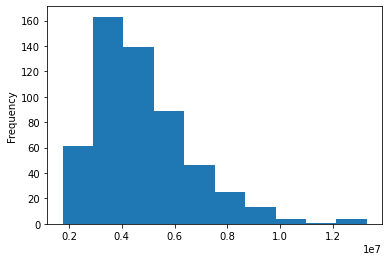

In [17]:
df.price.plot.hist();

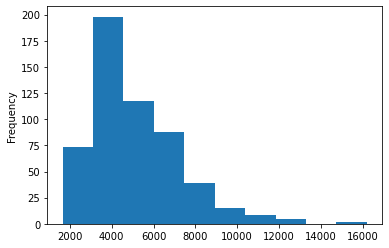

In [18]:
df.area.plot.hist();


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


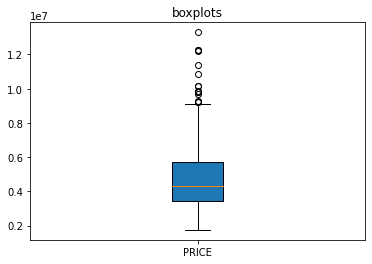

In [21]:
boxplot_data=df[['price']]
plt.title('boxplots')
plt.boxplot(boxplot_data,patch_artist=True,labels=['PRICE'])
plt.show()

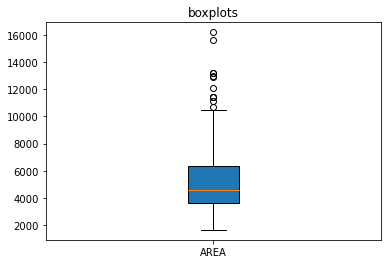

In [22]:
boxplotdata=df[['area']]
plt.title('boxplots')
plt.boxplot(boxplotdata,patch_artist=True,labels=['AREA'])
plt.show()

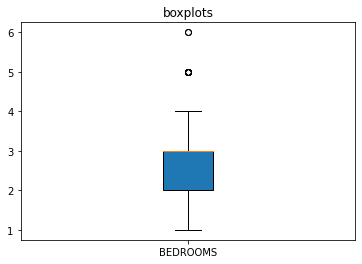

In [24]:
boxplotdata=df[['bedrooms']]
plt.title('boxplots')
plt.boxplot(boxplotdata,patch_artist=True,labels=['BEDROOMS'])
plt.show()

<AxesSubplot:>

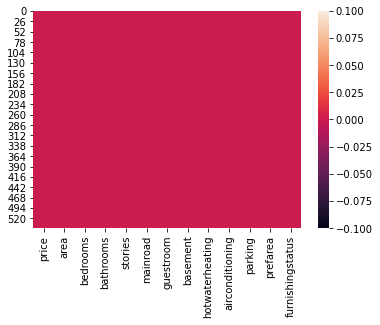

In [23]:
sns.heatmap(df.isnull())

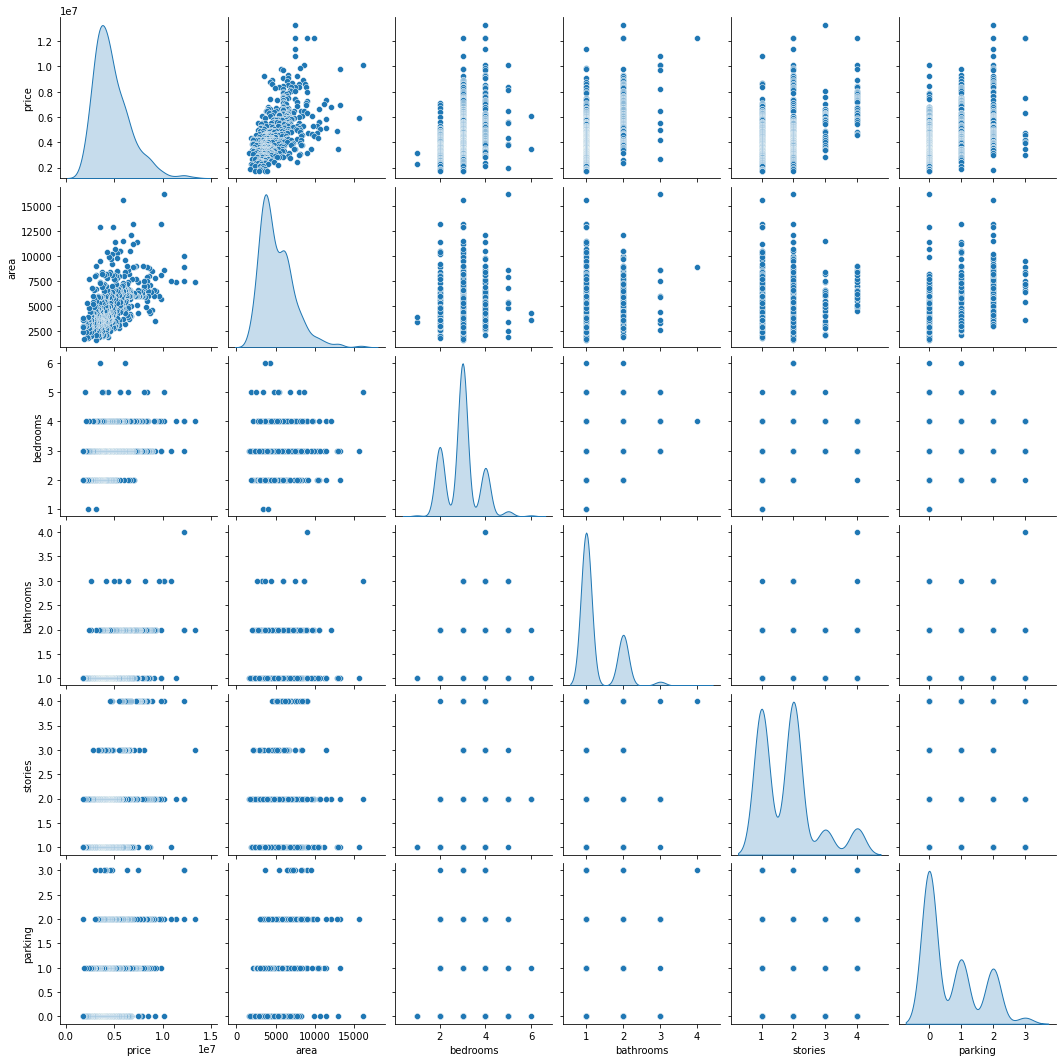

In [11]:
import seaborn as sns
sns.pairplot(data=df,diag_kind='kde')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [14]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [15]:
for label,  content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label+"_is_missing"] = pd.isnull(content)
        df[label] = pd.Categorical(content).codes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   price                        545 non-null    int64
 1   area                         545 non-null    int64
 2   bedrooms                     545 non-null    int64
 3   bathrooms                    545 non-null    int64
 4   stories                      545 non-null    int64
 5   mainroad                     545 non-null    int8 
 6   guestroom                    545 non-null    int8 
 7   basement                     545 non-null    int8 
 8   hotwaterheating              545 non-null    int8 
 9   airconditioning              545 non-null    int8 
 10  parking                      545 non-null    int64
 11  prefarea                     545 non-null    int8 
 12  furnishingstatus             545 non-null    int8 
 13  mainroad_is_missing          545 non-null    bool 

In [17]:
df.drop(df.columns[[13,14,15,16,17,18,19]],axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int8 
 6   guestroom         545 non-null    int8 
 7   basement          545 non-null    int8 
 8   hotwaterheating   545 non-null    int8 
 9   airconditioning   545 non-null    int8 
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int8 
 12  furnishingstatus  545 non-null    int8 
dtypes: int64(6), int8(7)
memory usage: 29.4 KB


In [19]:
cormat=df.corr()
cormat

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [20]:
X=df.drop('price',axis=1)
y=df[['price']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


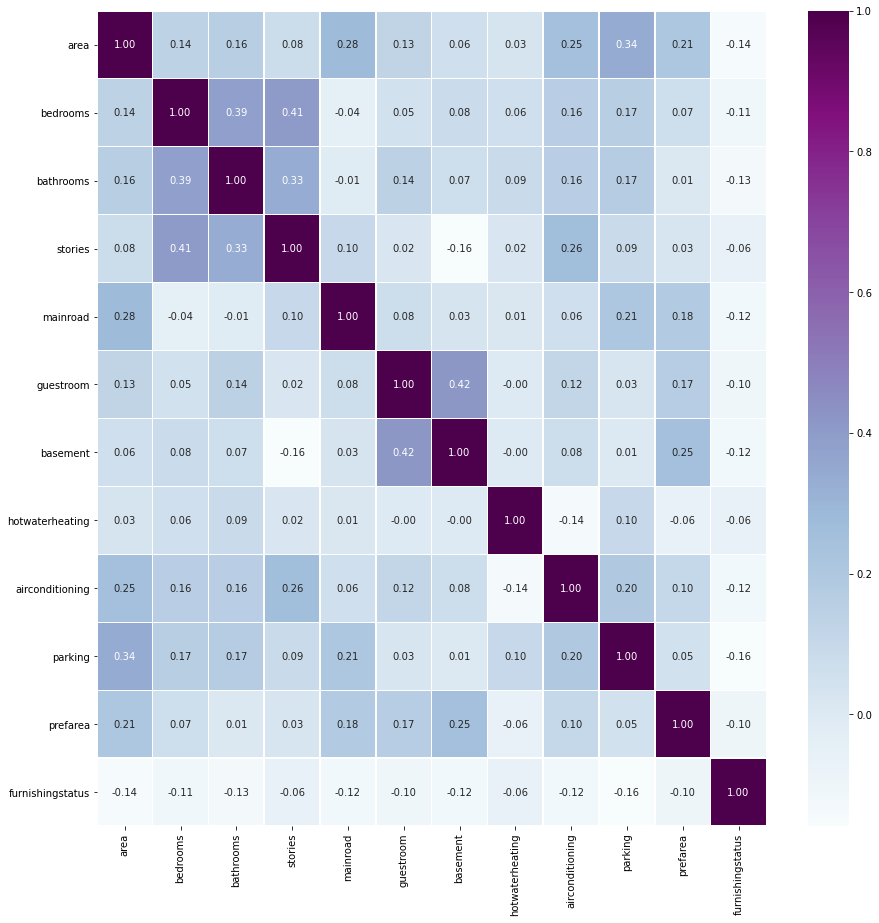

In [21]:
corr_mat = X_train.corr()
fig,ax = plt.subplots(figsize=[15,15])
ax=sns.heatmap(corr_mat,
               annot = True,
               linewidths = 0.5,
               fmt = (".2f"),
               cmap = "BuPu");

In [39]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

# Preparing Data for Machine learning algorithms

In [50]:
df["mainroad"] = df["mainroad"].astype('category').cat.codes
df["basement"] = df["basement"].astype('category').cat.codes

In [51]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [52]:

df["airconditioning"] = df["airconditioning"].astype('category').cat.codes



df["furnishingstatus"] = df["furnishingstatus"].astype('category').cat.codes

In [53]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [54]:
df.hotwaterheating.replace(to_replace=['yes','no'],value=[1,0],inplace=True)

In [55]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [56]:
df["prefarea"] = df["prefarea"].astype('category').cat.codes
df["guestroom"] = df["guestroom"].astype('category').cat.codes

In [57]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad             int8
guestroom            int8
basement             int8
hotwaterheating      int8
airconditioning      int8
parking             int64
prefarea             int8
furnishingstatus     int8
dtype: object

>>>> Trying to find  the  best feature for the target column 

In [87]:
Rfr = RandomForestRegressor()

Rfr.fit(X_train,y_train)


<ipython-input-87-bc7484e67d28>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rfr.fit(X_train,y_train)


RandomForestRegressor()

Elapsed time to compute the importances: 0.029 seconds


<Figure size 1296x288 with 0 Axes>

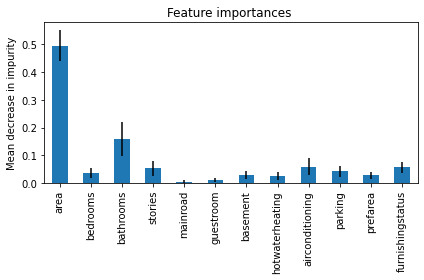

<Figure size 1296x288 with 0 Axes>

In [88]:
import time
import matplotlib.pyplot as plt


start_time = time.time()
importances = Rfr.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in Rfr.estimators_], axis=0)
elapsed_time = time.time() - start_time


print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")
forest_importances = pd.Series(importances, index=X.columns)


fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances ")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.figure(figsize=(18,4))

 >  area is somewhere shows importances to the target variable

                                     *******************************

## Now let's Select and Train the Model

In [90]:
from sklearn.model_selection import train_test_split
X=df.drop("price",axis=1)
y=df[['price']]

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [92]:
from sklearn.linear_model import LinearRegression
linear_regression_=LinearRegression()

In [93]:
linear_regression_.fit(X_train,y_train)

LinearRegression()

In [94]:
linear_regression_.score(X_test,y_test)

0.7235015223200351

In [95]:
linear_regression_.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

# Linear Regression

In [105]:
m=LinearRegression({'copy_X': True, 'fit_intercept' :True, 'n_jobs' :True,  'normalize':True})
m.fit(X_train,y_train)

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass fit_intercept={'copy_X': True, 'fit_intercept': True, 'n_jobs': True, 'normalize': True} as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


LinearRegression(fit_intercept={'copy_X': True, 'fit_intercept': True,
                                'n_jobs': True, 'normalize': True})

In [106]:
m.score(X_test,y_test)

0.7541187482996925

# Ridge Regression

In [107]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=1,solver='cholesky')
Ridge.fit(X_train, y_train)

Ridge(alpha=1, solver='cholesky')

In [108]:
Ridge.score(X_test,y_test)

0.753539441869925

# Lasso Regression

In [109]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(X_train, y_train)

Lasso(alpha=0.2)

In [110]:
Lasso.score(X_test,y_test)

0.7541186457508718

## Random Forest Regressor

In [111]:
from sklearn.ensemble import RandomForestRegressor as rfr
Rfr = rfr()
Rfr.fit(X_train,y_train)
x_train_pred = Rfr.predict(X_train)
x_test_pred = Rfr.predict(X_test)


In [112]:
x_train_pred

array([ 3727850.        ,  4971995.        ,  6920830.        ,
        5780180.        ,  4251030.        ,  3588690.        ,
        5742870.        ,  3099740.        ,  4466910.        ,
        3870968.5       ,  4132310.        ,  3865890.        ,
        6787900.        ,  3173380.        ,  3926930.        ,
        4885685.        ,  4163740.        ,  4637920.        ,
        3417067.5       ,  2760730.        ,  5042590.        ,
        2838255.        ,  5274080.        ,  5474140.        ,
        7961409.4       ,  5868100.        ,  3892361.66666667,
        2493960.        ,  8090909.4       ,  5077800.        ,
        6603660.        ,  7229530.        ,  4907420.        ,
        4272590.        ,  6894020.        ,  3615010.        ,
        7574677.6       ,  4452840.        ,  2390990.        ,
        4883410.        ,  7870730.        ,  5363470.        ,
        7131174.4       ,  5506130.        ,  2777810.        ,
       10930208.8       ,  5586700.     

In [113]:
Rfr.score(X_test,y_test)

0.7276298120830003

# hyperparamtrer tuning on random forest regressor`

In [114]:

from sklearn.model_selection import GridSearchCV

param_grid = [

    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

random_forest = rfr(random_state=42)
grid_search = GridSearchCV(random_forest, param_grid, cv=5,
                            return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [115]:
grid_search.score(X_test,y_test)

0.7512577532571605

In [116]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [117]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [118]:
Rfr = rfr(n_estimators=30,max_features=2,random_state=42,oob_score=True)
Rfr.fit(X_train,y_train)
x_train_pred = Rfr.predict(X_train)
x_test_pred = Rfr.predict(X_test)


In [119]:
dat_a={'mainroad':0,'guestroom':1,'basement':1,'hotwaterheating':0,'airconditioning':0,'prefarea':1,'furnishingstatus':2,'bedroom_new':3,'area_new':6360,'bathroom_new':2,'stories_new':2,'parking_new':1}

index=[1]

customer=pd.DataFrame(dat_a,index)

In [120]:
predi=grid_search.predict(customer)
print(predi)

[4420266.66666667]
